**텐서플로를 이용한 딥러닝**

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.20)

print('훈련용 데이터의 형태 :', x_train.shape)
print('훈련용 데이터의 레이블 형태 :', y_train.shape)
print('테스트용 데이터의 형태 :', x_test.shape)
print('테스트용 데이터의 레이블 형태 :', y_test.shape)
print('개별 훈련 데이터의 형태 :', x_train[0].shape)

훈련용 데이터의 형태 : (120, 4)
훈련용 데이터의 레이블 형태 : (120,)
테스트용 데이터의 형태 : (30, 4)
테스트용 데이터의 레이블 형태 : (30,)
개별 훈련 데이터의 형태 : (4,)


In [10]:
from tensorflow import keras

model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (4,)),
    keras.layers.Dense(60, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=1)

Epoch 1/30
24/24 [==============================] - 1s 2ms/step - loss: 1.6577 - accuracy: 0.3083
Epoch 2/30
24/24 [==============================] - 0s 1ms/step - loss: 0.9916 - accuracy: 0.3917
Epoch 3/30
24/24 [==============================] - 0s 2ms/step - loss: 0.9130 - accuracy: 0.5833
Epoch 4/30
24/24 [==============================] - 0s 1ms/step - loss: 0.8376 - accuracy: 0.6917
Epoch 5/30
24/24 [==============================] - 0s 1ms/step - loss: 0.7735 - accuracy: 0.6917
Epoch 6/30
24/24 [==============================] - 0s 1ms/step - loss: 0.7205 - accuracy: 0.7000
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.7167
Epoch 8/30
24/24 [==============================] - 0s 1ms/step - loss: 0.6338 - accuracy: 0.8000
Epoch 9/30
24/24 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.7000
Epoch 10/30
24/24 [==============================] - 0s 1ms/step - loss: 0.5765 - accuracy: 0.6917
Epoch 11/30
24/24 [

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (4,)),
    keras.layers.Dense(60, activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=0)
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('붓꽃 데이터의 분류 정확도 :', eval_acc)

신경망 모델의 학습 결과 :
1/1 [==============================] - 0s 138ms/step - loss: 0.0754 - accuracy: 1.0000
붓꽃 데이터의 분류 정확도 : 1.0


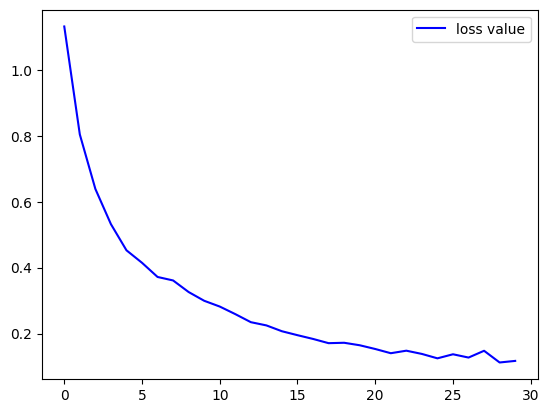

In [18]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], 'b-', label='loss value')
plt.legend()

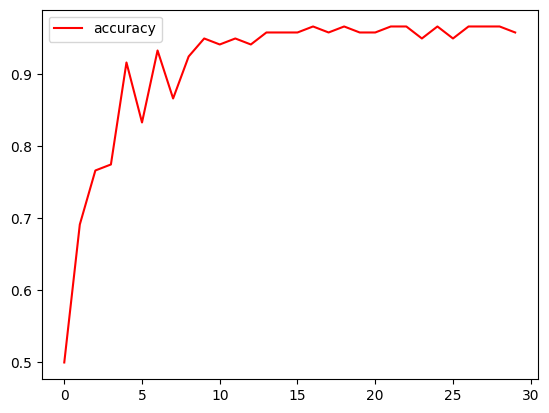

In [19]:
plt.plot(hist.history['accuracy'], 'r-', label='accuracy')
plt.legend()

In [21]:
model.save('./iris_model.h5')

In [22]:
!ls -l

total 64
-rw-r--r-- 1 root root 58872 Jul 26 04:50 iris_model.h5
drwxr-xr-x 1 root root  4096 Jul 20 13:28 sample_data


In [28]:
loaded = keras.models.load_model('./iris_model.h5')
loaded.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 4)                 0         
                                                                 
 dense_24 (Dense)            (None, 60)                300       
                                                                 
 dense_25 (Dense)            (None, 30)                1830      
                                                                 
 dense_26 (Dense)            (None, 3)                 93        
                                                                 
Total params: 2,223
Trainable params: 2,223
Non-trainable params: 0
_________________________________________________________________


In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

x_train = np.array([[0], [1], [2]])
y_train = 3 * x_train + 1   # y = 3x + 1 꼴의 함수
x_test = np.array([[3], [4], [5]])
y_test = 3 * x_test + 1     # y = 3x + 1 꼴의 함수

print('x_train :', x_train.flatten(),' y_train :', y_train.flatten())
print('x_test :', x_test.flatten(),' y_test :', y_test.flatten())

x_train : [0 1 2]  y_train : [1 4 7]
x_test : [3 4 5]  y_test : [10 13 16]
